# pycwr (Python China Weather Radar tools Libarary) Overview

In [1]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr

## Read compressed China radar data
radar_io can identify radar data types

In [2]:
filename = r"G:\tool\radar_tool\data\Z_RADR_I_Z9898_20190828181529_O_DOR_SAD_CAP_FMT.bin.bz2"

In [3]:
basedata = radar_io(filename) 

### Convert radar basedata to PRD class

In [4]:
PRD = basedata.ToPRD()

In [5]:
PRD.scan_info

<xarray.Dataset>
Dimensions:            (sweep: 9)
Coordinates:
  * sweep              (sweep) int32 0 1 2 3 4 5 6 7 8
Data variables:
    latitude           float64 20.0
    longitude          float64 110.2
    altitude           int32 118
    scan_type          <U3 'ppi'
    frequency          float64 2.73
    start_time         datetime64[ns] 2019-08-28T18:16:02.393134
    end_time           datetime64[ns] 2019-08-28T18:21:01.712371
    nyquist_velocity   (sweep) float32 27.83 27.83 ... 32.416397 32.416397
    unambiguous_range  (sweep) int32 300000 300000 146000 ... 124000 124000
    rays_per_sweep     (sweep) int64 361 361 363 362 363 361 364 364 364
    fixed_angle        (sweep) float32 0.48339844 1.4941406 ... 19.511719

In [6]:
PRD.fields[0]

<xarray.Dataset>
Dimensions:    (range: 1168, time: 361)
Coordinates:
    azimuth    (time) float64 285.3 286.2 287.2 288.2 ... 283.1 284.1 285.1
    elevation  (time) float64 0.48 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
    x          (time, range) float64 -241.2 -482.3 ... -2.814e+05 -2.817e+05
    y          (time, range) float64 65.84 131.7 197.5 ... 7.604e+04 7.611e+04
    z          (time, range) float64 120.1 122.2 124.3 ... 7.772e+03 7.783e+03
    lat        (time, range) float64 20.0 20.0 20.0 20.0 ... 20.66 20.66 20.66
    lon        (time, range) float64 110.2 110.2 110.2 ... 107.5 107.5 107.5
  * range      (range) float64 250.0 500.0 750.0 ... 2.918e+05 2.92e+05
  * time       (time) datetime64[ns] 2019-08-28T18:16:02.393134 ... 2019-08-28T18:16:25.134606
Data variables:
    V          (time, range) float64 -3.0 -2.5 -8.5 -4.0 ... nan nan nan nan
    W          (time, range) float64 0.5 1.0 4.5 3.0 2.0 ... nan nan nan nan nan
    dBT        (time, range) float64 33.5 26.0 25.0 22.5 ... nan nan nan nan
    dBZ        (time, range) float64 19.0 16.0 21.0 19.0 ... nan nan nan nan
    SQI        (time, range) float64 0.97 0.965 0.96 0.785 ... nan nan nan nan
    ZDR        (time, range) float64 3.55 3.55 -0.15 -0.49 ... nan nan nan nan
    CC         (time, range) float64 0.995 0.995 0.935 0.42 ... nan nan nan nan
    PhiDP      (time, range) float64 244.3 244.3 54.56 42.78 ... nan nan nan nan
    KDP        (time, range) float64 0.0 nan nan nan nan ... nan nan nan nan nan
    Zc         (time, range) float64 42.5 39.0 44.0 42.0 ... nan -7.5 nan nan

## Visualizing radar data

In [7]:
from pycwr.draw.SingleRadarPlot import RadarGraph
from pycwr.draw.SingleRadarPlotMap import RadarGraphMap

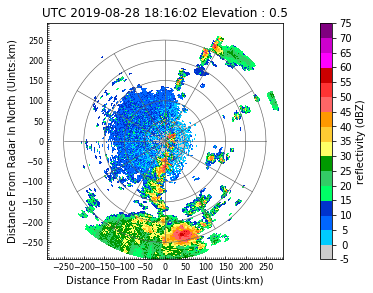

In [8]:
graph = RadarGraph(PRD)
graph.plot(0, "dBZ", continuously=False) ##level 1, "dBZ"

In [9]:
graph.plot?

Signature:
graph.plot(
    sweep,
    field_name,
    normvar=None,
    title=None,
    clabel=None,
    dark=False,
    continuously=False,
)
Docstring:
绘图
:param sweep: sweep从0开始
:param field_name: 产品场的名称
:return:
File:      c:\users\zy\anaconda3\lib\site-packages\pycwr\draw\singleradarplot.py
Type:      method


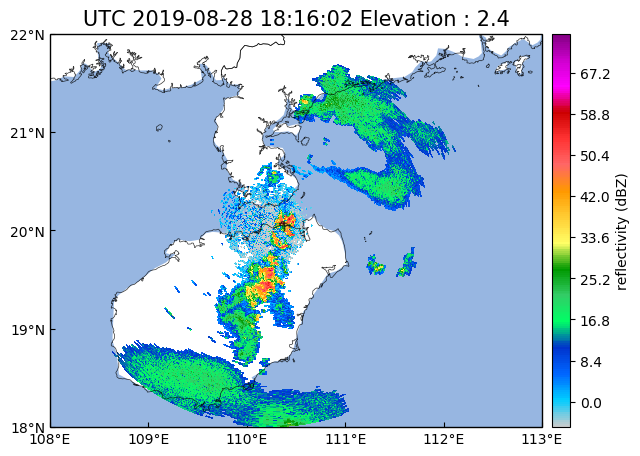

In [10]:
graph = RadarGraphMap(PRD)
graph.plot(2, "dBZ", continuously=True)

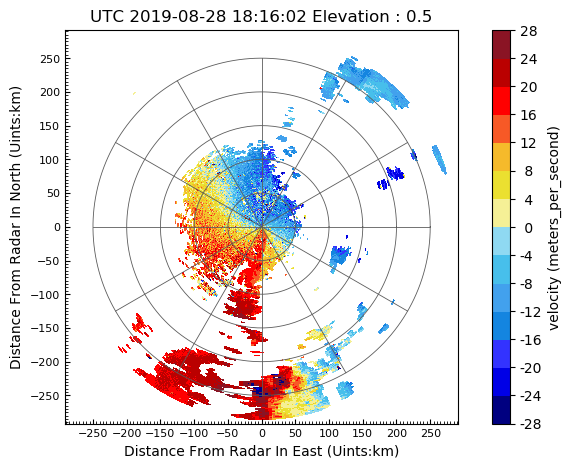

In [11]:
graph = RadarGraph(PRD)
graph.plot(0, "V", continuously=False)

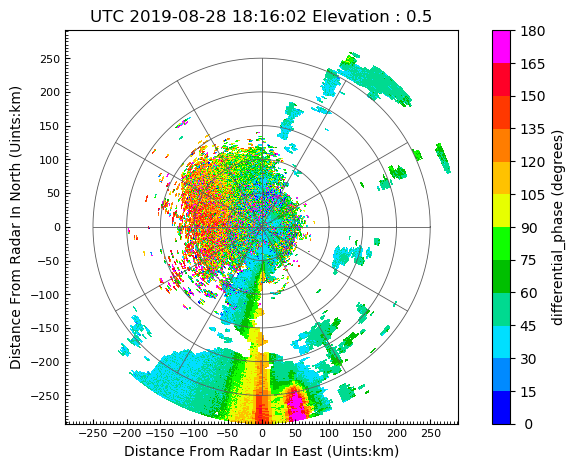

In [12]:
graph = RadarGraph(PRD)
graph.plot(0, "PhiDP", continuously=False)

## VCS plot

In [13]:
from pycwr.draw.VerticalSectionPlot import VerticalSection

In [14]:
vcs = VerticalSection(PRD)

In [19]:
vcs.section?

Signature:
vcs.section(
    start_point,
    end_point,
    field_name,
    title=None,
    clabel=None,
    continuously=False,
)
Docstring:
:param start_point:剖面的起点(x, y)
:param end_point:剖面的结束点(x, y)
:param field_name:要剖的数据场
:param title: 剖面图的title
:param clabel: colorbar的title
:param continuously: 是否使用连续的colorbar
:return:
File:      c:\users\zy\anaconda3\lib\site-packages\pycwr\draw\verticalsectionplot.py
Type:      method


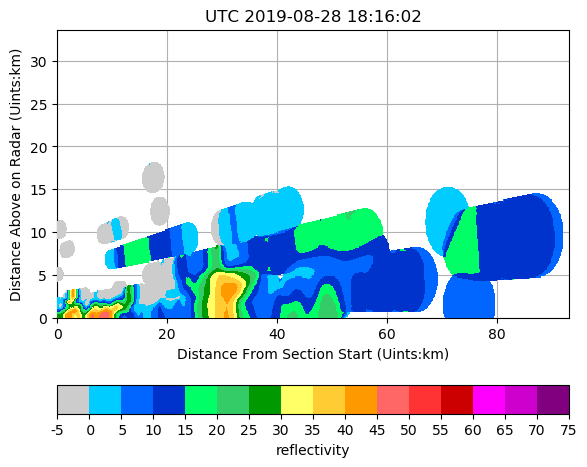

In [18]:
vcs.section((6500, -27344), (16000, -120000), "dBZ")

## radar data indexing and selecting
### Keywords for different radar products

'dBT':'total_power'

'dBZ': "reflectivity"

'V': "velocity"

'W': "spectrum_width"

'SQI':'normalized_coherent_power'

'ZDR': "differential_reflectivity"

'LDR': "linear_depolarization_ratio"

'CC': "cross_correlation_ratio"

'PhiDP': "differential_phase"

'KDP': "specific_differential_phase"

'CF': "clutter_flag"

'Zc': "corrected_reflectivity"

'Vc': "corrected_velocity"

### select correlation coefficient of the second sweep

In [13]:
cc = PRD.fields[1]['CC']  ##python indexing from 0

In [14]:
cc

<xarray.DataArray 'CC' (time: 361, range: 1168)>
array([[0.665, 0.665, 0.665, ...,   nan,   nan,   nan],
       [0.29 , 0.58 , 0.47 , ...,   nan,   nan,   nan],
       [0.29 , 0.58 , 0.47 , ...,   nan,   nan,   nan],
       ...,
       [0.245, 0.945, 0.945, ...,   nan,   nan,   nan],
       [0.705, 0.665, 0.34 , ...,   nan,   nan,   nan],
       [0.76 , 1.05 , 0.475, ...,   nan,   nan,   nan]])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
  * range      (range) float64 250.0 500.0 750.0 ... 2.918e+05 2.92e+05
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          ratio
    standard_name:  cross_correlation_ratio_hv
    long_name:      Cross correlation ratio (RHOHV)
    valid_max:      1.0
    valid_min:      0.0
    coordinates:    elevation azimuth range

In [15]:
cc.shape

(361, 1168)

In [16]:
cc.azimuth

<xarray.DataArray 'azimuth' (time: 361)>
array([337.790009, 338.779999, 339.76001 , ..., 335.630005, 336.630005,
       337.609985])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          degrees
    standard_name:  beam_azimuth_angle
    long_name:      azimuth_angle_from_true_north
    axis:           radial_azimuth_coordinate
    comment:        Azimuth of antenna relative to true north

In [17]:
cc.range

<xarray.DataArray 'range' (range: 1168)>
array([2.5000e+02, 5.0000e+02, 7.5000e+02, ..., 2.9150e+05, 2.9175e+05,
       2.9200e+05])
Coordinates:
  * range    (range) float64 250.0 500.0 750.0 ... 2.915e+05 2.918e+05 2.92e+05
Attributes:
    units:                meters
    standard_name:        projection_range_coordinate
    long_name:            range_to_measurement_volume
    axis:                 radial_range_coordinate
    spacing_is_constant:  true
    comment:              Coordinate variable for range. Range to center of e...

### select the correlation coefficient of 50km away from the radar

In [18]:
cc.sel(range=50000, method='nearest')

<xarray.DataArray 'CC' (time: 361)>
array([0.97, 1.05, 1.05, ..., 1.05, 1.05, 1.05])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
    range      float64 5e+04
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          ratio
    standard_name:  cross_correlation_ratio_hv
    long_name:      Cross correlation ratio (RHOHV)
    valid_max:      1.0
    valid_min:      0.0
    coordinates:    elevation azimuth range

### select the correlation coefficient in 20-50km

In [19]:
cc_sel = cc.sel(range=slice(20000,50000))

In [20]:
cc_sel

<xarray.DataArray 'CC' (time: 361, range: 121)>
array([[0.74 , 0.475, 0.475, ..., 0.64 , 0.955, 0.97 ],
       [0.525, 1.05 , 0.495, ..., 0.955, 1.05 , 1.05 ],
       [0.525, 1.05 , 0.495, ..., 0.955, 1.05 , 1.05 ],
       ...,
       [0.37 , 0.36 , 0.33 , ..., 0.885, 1.05 , 1.05 ],
       [0.645, 0.76 , 0.76 , ..., 1.05 , 1.05 , 1.05 ],
       [0.74 , 0.74 , 0.74 , ..., 0.67 , 1.05 , 1.05 ]])
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
  * range      (range) float64 2e+04 2.025e+04 2.05e+04 ... 4.975e+04 5e+04
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Attributes:
    units:          ratio
    standard_name:  cross_correlation_ratio_hv
    long_name:      Cross correlation ratio (RHOHV)
    valid_max:      1.0
    valid_min:      0.0
    coordinates:    elevation azimuth range

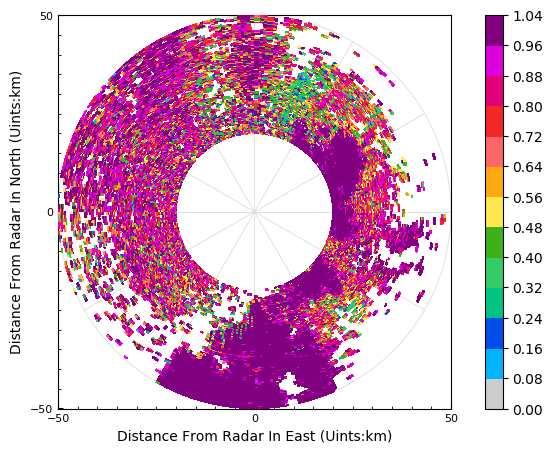

In [21]:
from pycwr.draw.SingleRadarPlot import RadarGraph
RadarGraph.simple_plot_ppi(cc_sel.range, cc_sel.azimuth, cc_sel.elevation,\
                           cc_sel, cmap="CN_ref", normvar=(0,1))

### Select the reflectivity factor at range in 60km and azimuth in 34 °

In [22]:
dbz = PRD.fields[0]['dBZ']
da_array = xr.DataArray(dbz, coords=[dbz.azimuth, dbz.range], dims=['azimuth', 'range'])

In [23]:
da_array.coords["elevation"] = (['azimuth', ], dbz.elevation)

In [24]:
sort_dbz = da_array.sortby("azimuth", ascending=True)

In [25]:
sort_dbz.sel(azimuth=34, range=60000, method='nearest')

<xarray.DataArray 'dBZ' ()>
array(nan)
Coordinates:
    azimuth    float64 33.88
    range      float64 6e+04
    elevation  float64 0.52
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### select data between 120 ° and 270 ° azimuth

In [26]:
dbz_test = sort_dbz.sel(azimuth=slice(120,240))

In [27]:
dbz_test

<xarray.DataArray 'dBZ' (azimuth: 119, range: 1168)>
array([[21.5, 27. , 39. , ...,  nan,  nan,  nan],
       [30. , 34.5, 41.5, ...,  nan,  nan,  nan],
       [31.5, 35.5, 45. , ...,  nan,  nan,  nan],
       ...,
       [ 7.5, -1. , -2. , ...,  nan,  nan,  nan],
       [-0.5,  1. , -8.5, ...,  nan,  nan,  nan],
       [ 1.5,  2. , -3. , ...,  nan,  nan,  nan]])
Coordinates:
  * azimuth    (azimuth) float64 121.0 122.0 123.0 124.0 ... 237.1 238.1 239.1
  * range      (range) float64 250.0 500.0 750.0 ... 2.918e+05 2.92e+05
    elevation  (azimuth) float64 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### show this area result

In [28]:
from pycwr.draw.SingleRadarPlot import RadarGraph

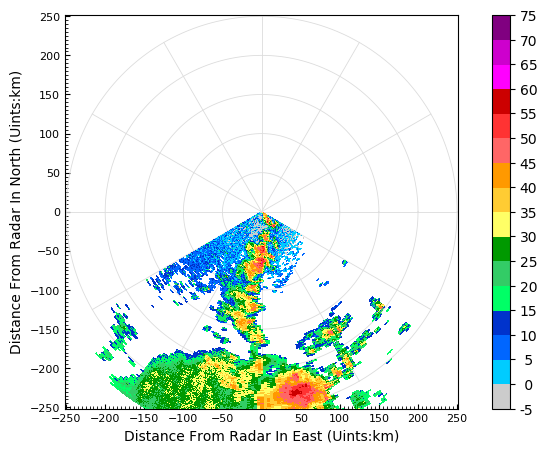

In [29]:
RadarGraph.simple_plot_ppi(dbz_test.range, dbz_test.azimuth, dbz_test.elevation,\
                           dbz_test, cmap="CN_ref", normvar=(-5,75))

### Radar coordinate system transformation, select the second sweep as example

In [30]:
level2 = PRD.fields[1]

In [31]:
level2

<xarray.Dataset>
Dimensions:    (range: 1168, time: 361)
Coordinates:
    azimuth    (time) float64 337.8 338.8 339.8 340.7 ... 335.6 336.6 337.6
    elevation  (time) float64 1.49 1.49 1.49 1.49 1.49 ... 1.53 1.53 1.53 1.53
  * range      (range) float64 250.0 500.0 750.0 ... 2.918e+05 2.92e+05
  * time       (time) datetime64[ns] 2019-08-28T18:17:01.349754 ... 2019-08-28T18:17:24.091151
Data variables:
    V          (time, range) float64 nan -4.0 -12.5 -9.5 ... nan nan nan nan
    W          (time, range) float64 nan 3.0 3.0 0.0 3.0 ... nan nan nan nan nan
    dBT        (time, range) float64 22.5 22.5 23.0 10.5 ... nan nan nan nan
    dBZ        (time, range) float64 -14.0 -13.5 -13.5 -12.5 ... nan nan nan nan
    SQI        (time, range) float64 nan nan nan nan nan ... nan nan nan nan nan
    ZDR        (time, range) float64 -1.46 -2.26 0.96 0.43 ... nan nan nan nan
    CC         (time, range) float64 0.665 0.665 0.665 0.47 ... nan nan nan nan
    PhiDP      (time, range) float64

#### Radar coordinate system to Cartesian coordinate system

In [32]:
from pycwr.core.transforms import antenna_vectors_to_cartesian

In [33]:
isinstance(level2.range, xr.DataArray)

True

In [34]:
assert isinstance(level2.range, np.ndarray) | isinstance(level2.range, xr.DataArray), "check"

In [35]:
x, y, z = antenna_vectors_to_cartesian(level2.range, level2.azimuth, level2.elevation)

In [38]:
x

array([[-9.44685345e+01, -1.88936924e+02, -2.83405169e+02, ...,
        -1.10009136e+05, -1.10103325e+05, -1.10197514e+05],
       [-9.04568376e+01, -1.80913537e+02, -2.71370097e+02, ...,
        -1.05337492e+05, -1.05427682e+05, -1.05517871e+05],
       [-8.64589769e+01, -1.72917821e+02, -2.59376533e+02, ...,
        -1.00681961e+05, -1.00768165e+05, -1.00854368e+05],
       ...,
       [-1.03120007e+02, -2.06239852e+02, -3.09359535e+02, ...,
        -1.20080957e+05, -1.20183768e+05, -1.20286578e+05],
       [-9.91313730e+01, -1.98262590e+02, -2.97393651e+02, ...,
        -1.15436281e+05, -1.15535115e+05, -1.15633948e+05],
       [-9.51932857e+01, -1.90386422e+02, -2.85579408e+02, ...,
        -1.10850466e+05, -1.10945373e+05, -1.11040281e+05]])

### Converting a Cartesian coordinate system to a latitude and longitude coordinate system

In [39]:
from pycwr.core.transforms import cartesian_to_geographic_aeqd

In [40]:
lon, lat = cartesian_to_geographic_aeqd(x, y, PRD.scan_info.longitude.values, PRD.scan_info.latitude.values)

In [41]:
lon.min()

107.45592386051531

In [42]:
lon

array([[110.24493026, 110.24402615, 110.24312201, ..., 109.17594158,
        109.17501012, 109.17407864],
       [110.24496865, 110.24410293, 110.24323719, ..., 109.22125507,
        109.22036295, 109.2194708 ],
       [110.24500691, 110.24417945, 110.24335197, ..., 109.26642853,
        109.26557564, 109.26472272],
       ...,
       [110.24484746, 110.24386055, 110.24287361, ..., 109.07830892,
        109.07729278, 109.07627662],
       [110.24488563, 110.2439369 , 110.24298813, ..., 109.12332261,
        109.12234552, 109.1213684 ],
       [110.24492332, 110.24401227, 110.2431012 , ..., 109.16778364,
        109.16684513, 109.16590659]])

In [43]:
lat

array([[19.99847017, 20.00055095, 20.00263172, ..., 22.41619526,
        22.41826412, 22.42033298],
       [19.99848454, 20.00057969, 20.00267482, ..., 22.43319866,
        22.43528233, 22.43736598],
       [19.99849815, 20.0006069 , 20.00271565, ..., 22.44930354,
        22.45140123, 22.45349891],
       ...,
       [19.99843664, 20.00048387, 20.0025311 , ..., 22.37645957,
        22.37849381, 22.38052803],
       [19.99845251, 20.00051562, 20.00257872, ..., 22.39523839,
        22.39728897, 22.39933953],
       [19.99846745, 20.00054551, 20.00262356, ..., 22.41292232,
        22.41498829, 22.41705424]])

## Match ground station

In [44]:
lat_station = np.array([20.5, 19.2, 21])
lon_station = np.array([108.9, 110.1, 111.5])
npoint = lon_station.shape[0]

### Calculate distance from each point (degree)

In [45]:
range_point = (lat[...,np.newaxis] - lat_station.reshape(1,1,-1))**2 + \
(lon[...,np.newaxis] - lon_station.reshape(1,1,-1))**2  

In [46]:
range_point.shape

(361, 1168, 3)

### Find the row and column of the array corresponding to station

In [47]:
index_station = []
for i in range(npoint):
    ind = np.unravel_index(range_point[:,:,i].argmin(), range_point[:,:,i].shape)
    index_station.append(ind)

In [48]:
index_station

[(314, 604), (212, 359), (72, 687)]

### select station data

In [49]:
for ind in index_station:
    print(level2.isel(time=ind[0], range=ind[1]))

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    azimuth    float64 291.6
    elevation  float64 1.53
    range      float64 1.512e+05
    time       datetime64[ns] 2019-08-28T18:17:21.185338
Data variables:
    V          float64 nan
    W          float64 nan
    dBT        float64 nan
    dBZ        float64 nan
    SQI        float64 nan
    ZDR        float64 nan
    CC         float64 nan
    PhiDP      float64 nan
    KDP        float64 nan
    Zc         float64 -7.5
<xarray.Dataset>
Dimensions:    ()
Coordinates:
    azimuth    float64 189.6
    elevation  float64 1.49
    range      float64 9e+04
    time       datetime64[ns] 2019-08-28T18:17:14.741931
Data variables:
    V          float64 nan
    W          float64 nan
    dBT        float64 24.5
    dBZ        float64 24.5
    SQI        float64 nan
    ZDR        float64 0.7
    CC         float64 0.99
    PhiDP      float64 56.74
    KDP        float64 0.1
    Zc         float64 25.0
<xarray.Dataset>
Dimensions:    ()


## attenuation correct

In [53]:
from pycwr.qc.attenuation import correct_attenuation_HB

In [54]:
dbz = PRD.fields[0]["dBZ"]

In [55]:
dbz_corr, pia = correct_attenuation_HB(dbz, a=1.67e-4, b=0.7)

C:\Users\zy\anaconda3\lib\site-packages\pycwr-0.2-py3.7.egg\pycwr\qc\attenuation.py:31: RuntimeWarning: overflow encountered in power
  k = a * (10.0 ** ((Ref[:, gate] + ksum) / 10.0)) ** b * 2.0 * gate_length


In [56]:
dbz

<xarray.DataArray 'dBZ' (time: 361, range: 1168)>
array([[19. , 16. , 21. , ...,  nan,  nan,  nan],
       [20. , 15. , 18. , ...,  nan,  nan,  nan],
       [18. , 14.5, 11.5, ...,  nan,  nan,  nan],
       ...,
       [ 9. ,  3. , 10. , ...,  nan,  nan,  nan],
       [ 6.5, 14. , 17. , ...,  nan,  nan,  nan],
       [19. , 16. , 21. , ...,  nan,  nan,  nan]])
Coordinates:
    azimuth    (time) float64 285.3 286.2 287.2 288.2 ... 283.1 284.1 285.1
    elevation  (time) float64 0.48 0.48 0.48 0.48 0.48 ... 0.52 0.52 0.52 0.52
  * range      (range) float64 250.0 500.0 750.0 ... 2.918e+05 2.92e+05
  * time       (time) datetime64[ns] 2019-08-28T18:16:02.393134 ... 2019-08-28T18:16:25.134606
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    valid_max:      80.0
    valid_min:      -30.0
    coordinates:    elevation azimuth range

### Remove echoes with low correlation coefficient in the first elevation

In [57]:
ref_1 = PRD.fields[0].dBZ
cc = PRD.fields[0].CC

In [58]:
out = xr.where(cc<0.9, np.nan, ref_1)

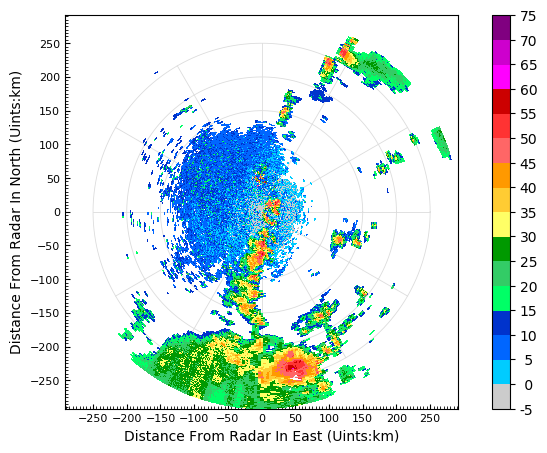

In [59]:
RadarGraph.simple_plot_ppi(out.range, out.azimuth, out.elevation, out, cmap="CN_ref", normvar=(-5,75))

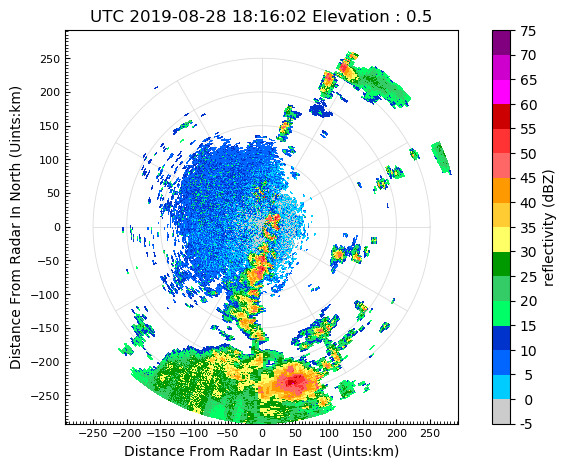

In [60]:
graph = RadarGraph(PRD)
graph.plot(0, "dBZ", continuously=False)

## using pycwr with Py-ART

In [61]:
import pyart
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\zy\anaconda3\lib\site-packages\h5py\_hl\base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
C:\Users\zy\anaconda3\lib\site-packages\h5py\_hl\base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
C:\Users\zy\anaconda3\lib\site-packages\h5py\_hl\base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,


In [62]:
radar = basedata.ToPyartRadar()

C:\Users\zy\anaconda3\lib\site-packages\pyart\map\gates_to_grid.py:177: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


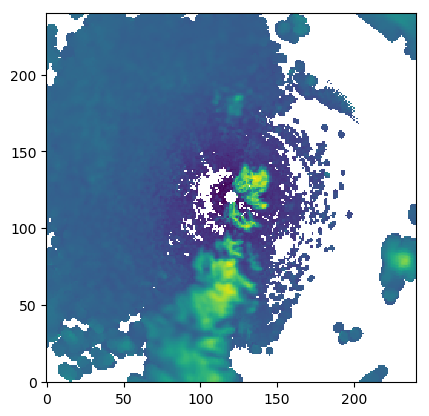

In [63]:
radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('reflectivity')

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=['reflectivity'])

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['reflectivity']['data'][0], origin='lower')
plt.show()

## save as cfradial format

In [64]:
pyart.io.write_cfradial("cfradial.nc", radar)

C:\Users\zy\anaconda3\lib\site-packages\pyart\io\cfradial.py:719: UserWarning: Warning, converting non-array to array:pulse_width
  warnings.warn("Warning, converting non-array to array:%s" % name)


In [65]:
xr.open_dataset("cfradial.nc")

<xarray.Dataset>
Dimensions:                      (frequency: 1, range: 1168, sweep: 9, time: 3263)
Coordinates:
  * time                         (time) datetime64[ns] 2019-08-28T18:16:02.393133997 ... 2019-08-28T18:21:01.712371826
  * range                        (range) float64 250.0 500.0 ... 2.92e+05
    azimuth                      (time) float64 ...
    elevation                    (time) float64 ...
  * frequency                    (frequency) float32 2730000000.0
Dimensions without coordinates: sweep
Data variables:
    velocity                     (time, range) float64 ...
    spectrum_width               (time, range) float64 ...
    total_power                  (time, range) float64 ...
    reflectivity                 (time, range) float64 ...
    normalized_coherent_power    (time, range) float64 ...
    differential_reflectivity    (time, range) float64 ...
    cross_correlation_ratio      (time, range) float64 ...
    differential_phase           (time, range) float64 ..